In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns



Wczytanie danych

In [2]:
df = pd.read_csv('kaggle/Diabetes Classification.csv')

Usunięcie kolumny 'Unnamed: 0'

In [3]:
df = df.drop(columns=['Unnamed: 0'])

Zakodowanie zmiennych kategorycznych

In [4]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

Podział danych na cechy (X) i etykiety (y)

In [5]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

Podział na zbiór treningowy i testowy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Skalowanie danych

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Random Forest

In [8]:
clf = RandomForestClassifier(random_state=42)

Definicja parametrów do grid search

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

Inicjalizacja GridSearchCV

In [10]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

Trenowanie modelu

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Wyświetlenie najlepszych parametrów

In [12]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


Przewidywanie na zbiorze testowym

In [13]:
y_pred = grid_search.best_estimator_.predict(X_test)

Ocena modelu

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.82
Confusion Matrix:
[[541  63]
 [123 300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       604
           1       0.83      0.71      0.76       423

    accuracy                           0.82      1027
   macro avg       0.82      0.80      0.81      1027
weighted avg       0.82      0.82      0.82      1027



Ocena modelu na zestawie treningowym przy użyciu walidacji krzyżowej

In [15]:
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation accuracy: {cross_val_scores.mean():.2f}')

Cross-validation scores: [0.82460414 0.84774665 0.82460414 0.82216809 0.84287454]
Mean cross-validation accuracy: 0.83


Rysowanie znaczenia cech

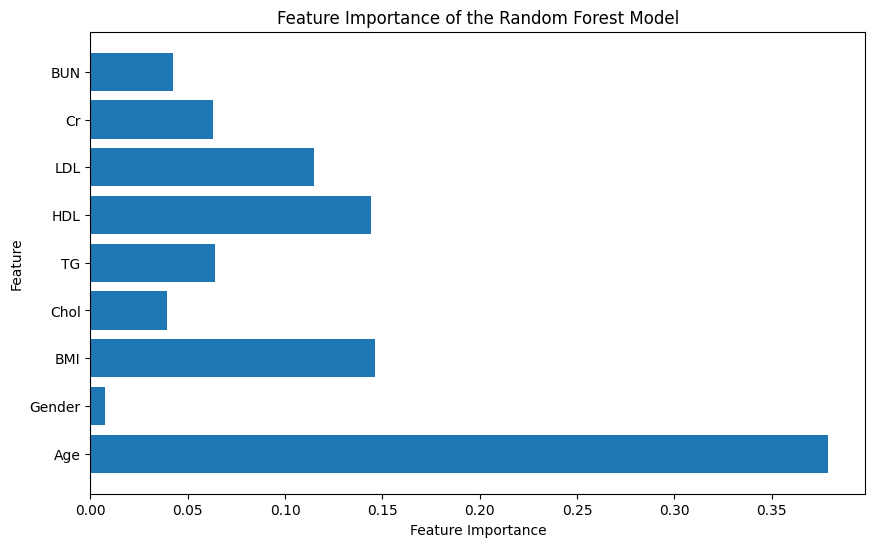

In [16]:
feature_importances = grid_search.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of the Random Forest Model')
plt.show()

Krzywa ROC i AUC

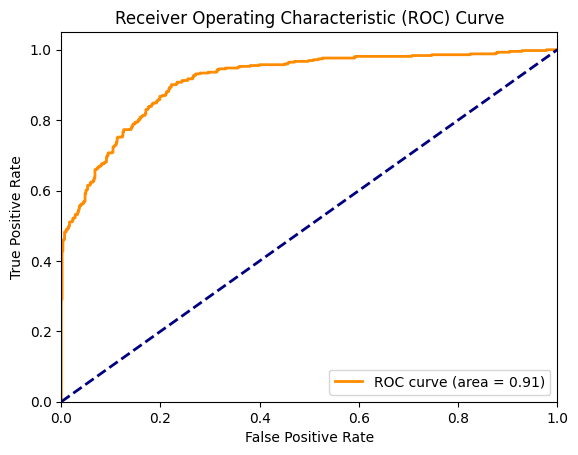

In [17]:
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Krzywa Precision-Recall

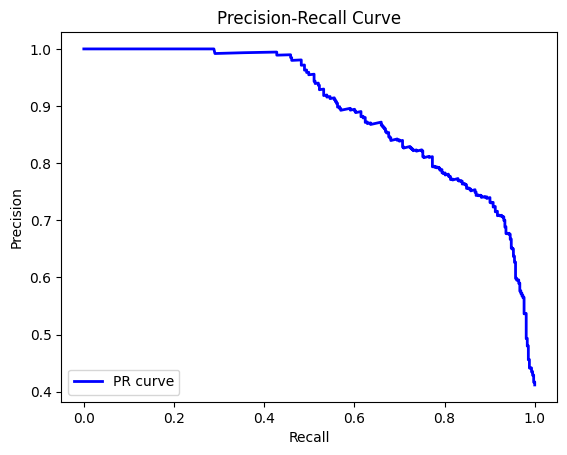

In [18]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, lw=2, color='blue', label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()